# LAB 8B - TEXT ANALYTICS / INTRO TO NLP

This lab is comprised of 3 parts:

- 1. Basic Text Cleaning

- 2. The Document-Term Matrix

- 3. Supervised Learning with Text

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#You can delete this line if you are not using Google Colab.
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/MyDrive/UCB Files/2022 Fall/IEOR 142/Lab/Week10/'

Mounted at /content/drive


In [3]:
#path = '' #uncomment this if you don't need to specify your path
fname = 'tweets.csv'
tweets = pd.read_csv(path + fname)
tweets.head(10)

,Tweet,Avg
0,"IMO, @apple's new #iphone 5S/C was meant to co...",0.0
1,RT @SWAGGA_L: THE WORST ! RT @Mati_uCurvegawd...,-0.8
2,@mog_sharif @Apples @Android @Microsoft @Apple...,0.0
3,I hope the 5s battery life is better than the ...,-1.0
4,@DeltaAssist *EP it gets worse. The notificati...,-1.2
5,@Apple #iOS7..Everybody get ready to experienc...,1.0
6,Could @Apple & @PayPal announcements be game c...,0.0
7,"@apple, thank you so much for making all the i...",-1.0
8,@battalalgoos @apple,-0.2
9,@apple let iphones use gifs as wallpapers,0.0


In [4]:
tweets.info()
tweets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tweet   1181 non-null   object 
 1   Avg     1181 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.6+ KB


,Avg
count,1181.000000
mean,-0.193057
std,0.676421
min,-2.000000
25%,-0.600000
50%,0.000000
75%,0.200000
max,2.000000


We want to predict negative sentiment, so let's create a new variable called `Negative` that converts the sentiment number to negative (or not negative), anything less than or equal to -1 is negative

In [5]:
tweets['Negative'] = (tweets['Avg'] <= -1).astype('int32').astype('object')

# And remove the old "Avg" column - we won't use it anymore
tweets.drop(columns=['Avg'], inplace=True)
tweets.head()

,Tweet,Negative
0,"IMO, @apple's new #iphone 5S/C was meant to co...",0
1,RT @SWAGGA_L: THE WORST ! RT @Mati_uCurvegawd...,0
2,@mog_sharif @Apples @Android @Microsoft @Apple...,0
3,I hope the 5s battery life is better than the ...,1
4,@DeltaAssist *EP it gets worse. The notificati...,1


Before going any further, lets understand the rough distribution of negative tweets in our data set:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    999
1    182
Name: Negative, dtype: int64


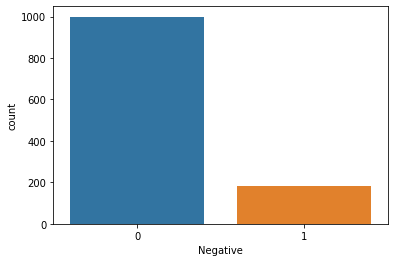

In [6]:
import seaborn as sns

sns.countplot(tweets['Negative'], order=tweets['Negative'].value_counts().index);
print(tweets['Negative'].value_counts())

## 1. BASIC TEXT CLEANING

In [7]:
text = tweets['Tweet']
text

0       IMO, @apple's new #iphone 5S/C was meant to co...
1       RT @SWAGGA_L: THE WORST !  RT @Mati_uCurvegawd...
2       @mog_sharif @Apples @Android @Microsoft @Apple...
3       I hope the 5s battery life is better than the ...
4       @DeltaAssist *EP it gets worse. The notificati...
                              ...                        
1176    Why does @windowsphone and @Android constantly...
1177    Dear @Apple - I'm a little peeved at y'all not...
1178    {#IPODPLAYERPROMO #IPOD #IPAD #ITUNES #APPLE #...
1179                        @xfrancesjoanna @crocs @apple
1180    @mediacat Ortada algilari etkileyecek ucuz bir...
Name: Tweet, Length: 1181, dtype: object

### Change to Lowercase

In [8]:
text_lowercase = text.str.lower()
text_lowercase

0       imo, @apple's new #iphone 5s/c was meant to co...
1       rt @swagga_l: the worst !  rt @mati_ucurvegawd...
2       @mog_sharif @apples @android @microsoft @apple...
3       i hope the 5s battery life is better than the ...
4       @deltaassist *ep it gets worse. the notificati...
                              ...                        
1176    why does @windowsphone and @android constantly...
1177    dear @apple - i'm a little peeved at y'all not...
1178    {#ipodplayerpromo #ipod #ipad #itunes #apple #...
1179                        @xfrancesjoanna @crocs @apple
1180    @mediacat ortada algilari etkileyecek ucuz bir...
Name: Tweet, Length: 1181, dtype: object

Or use the apply method in conjunction with the desired function:

In [9]:
text_lowercase = text.apply(str.lower)
text_lowercase

0       imo, @apple's new #iphone 5s/c was meant to co...
1       rt @swagga_l: the worst !  rt @mati_ucurvegawd...
2       @mog_sharif @apples @android @microsoft @apple...
3       i hope the 5s battery life is better than the ...
4       @deltaassist *ep it gets worse. the notificati...
                              ...                        
1176    why does @windowsphone and @android constantly...
1177    dear @apple - i'm a little peeved at y'all not...
1178    {#ipodplayerpromo #ipod #ipad #itunes #apple #...
1179                        @xfrancesjoanna @crocs @apple
1180    @mediacat ortada algilari etkileyecek ucuz bir...
Name: Tweet, Length: 1181, dtype: object

### Remove Punctuation

In [13]:
from string import punctuation

def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct

In [14]:
text_no_punct = text_lowercase.apply(remove_punctuation)
text_no_punct

0       imo apples new iphone 5sc was meant to confuse...
1       rt swaggal the worst   rt matiucurvegawd yooo ...
2       mogsharif apples android microsoft apple thats...
3       i hope the 5s battery life is better than the ...
4       deltaassist ep it gets worse the notification ...
                              ...                        
1176    why does windowsphone and android constantly t...
1177    dear apple  im a little peeved at yall not doi...
1178    ipodplayerpromo ipod ipad itunes apple promo i...
1179                           xfrancesjoanna crocs apple
1180    mediacat ortada algilari etkileyecek ucuz bir ...
Name: Tweet, Length: 1181, dtype: object

### Remove Digits

In [15]:
def remove_digit(document): 
    
    no_digit = ''.join([character for character in document if not character.isdigit()])
              
    return no_digit

In [16]:
text_no_digit = text_no_punct.apply(remove_digit)
text_no_digit

0       imo apples new iphone sc was meant to confuse ...
1       rt swaggal the worst   rt matiucurvegawd yooo ...
2       mogsharif apples android microsoft apple thats...
3       i hope the s battery life is better than the  ...
4       deltaassist ep it gets worse the notification ...
                              ...                        
1176    why does windowsphone and android constantly t...
1177    dear apple  im a little peeved at yall not doi...
1178    ipodplayerpromo ipod ipad itunes apple promo i...
1179                           xfrancesjoanna crocs apple
1180    mediacat ortada algilari etkileyecek ucuz bir ...
Name: Tweet, Length: 1181, dtype: object

### Tokenization 

In order to do certain word-related manipulations, we will first tokenize the text, i.e. transform the complete text string into a vector of words

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
from nltk.tokenize import word_tokenize

text_tokenized = text_no_digit.apply(word_tokenize)
text_tokenized.head()

0    [imo, apples, new, iphone, sc, was, meant, to,...
1    [rt, swaggal, the, worst, rt, matiucurvegawd, ...
2    [mogsharif, apples, android, microsoft, apple,...
3    [i, hope, the, s, battery, life, is, better, t...
4    [deltaassist, ep, it, gets, worse, the, notifi...
Name: Tweet, dtype: object

### Remove Stopwords

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Together with the stopwords, we want to remove also the word "apple", as this is a word common to all of our tweets

In [20]:
stop_words.add('apple')

In [21]:
def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]
    
    return words

In [22]:
text_no_stop = text_tokenized.apply(remove_stopwords)
text_no_stop

0       [imo, apples, new, iphone, sc, meant, confuse,...
1       [rt, swaggal, worst, rt, matiucurvegawd, yooo,...
2       [mogsharif, apples, android, microsoft, thats,...
3       [hope, battery, life, better, day, isnt, even,...
4       [deltaassist, ep, gets, worse, notification, r...
                              ...                        
1176    [windowsphone, android, constantly, try, compe...
1177    [dear, im, little, peeved, yall, c, preorders,...
1178    [ipodplayerpromo, ipod, ipad, itunes, promo, i...
1179                              [xfrancesjoanna, crocs]
1180    [mediacat, ortada, algilari, etkileyecek, ucuz...
Name: Tweet, Length: 1181, dtype: object

### Stemming

In [24]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(word) for word in document]
    
    return stemmed_document

In [25]:
text_stemmed = text_no_stop.apply(stemmer)
text_stemmed

0       [imo, appl, new, iphon, sc, meant, confus, rus...
1       [rt, swaggal, worst, rt, matiucurvegawd, yooo,...
2       [mogsharif, appl, android, microsoft, that, ve...
3       [hope, batteri, life, better, day, isnt, even,...
4       [deltaassist, ep, get, wors, notif, remain, ev...
                              ...                        
1176    [windowsphon, android, constantli, tri, compet...
1177    [dear, im, littl, peev, yall, c, preorder, ain...
1178    [ipodplayerpromo, ipod, ipad, itun, promo, ipo...
1179                               [xfrancesjoanna, croc]
1180    [mediacat, ortada, algilari, etkileyecek, ucuz...
Name: Tweet, Length: 1181, dtype: object

Seems we didn't catch all of the "apples"...

In [26]:
text_stemmed = text_stemmed.apply(lambda document: [word for word in document if not word == 'appl'])
text_stemmed

0       [imo, new, iphon, sc, meant, confus, russian, ...
1       [rt, swaggal, worst, rt, matiucurvegawd, yooo,...
2        [mogsharif, android, microsoft, that, veryright]
3       [hope, batteri, life, better, day, isnt, even,...
4       [deltaassist, ep, get, wors, notif, remain, ev...
                              ...                        
1176    [windowsphon, android, constantli, tri, compet...
1177    [dear, im, littl, peev, yall, c, preorder, ain...
1178    [ipodplayerpromo, ipod, ipad, itun, promo, ipo...
1179                               [xfrancesjoanna, croc]
1180    [mediacat, ortada, algilari, etkileyecek, ucuz...
Name: Tweet, Length: 1181, dtype: object

## 2. THE DOCUMENT-TERM MATRIX

We finished our basic cleaning, so now we want to calculate frequencies of words across the tweets and create a document-term matrix (DTM).

In the previous section we tokenized the text in order to apply cleaning techniques. The sklearn package we will use performs tokenization automatically, so actually we will need to pass detokenized text to the DTM constructor. 

Let's start by detokenizing the text:

### Detokenization

In [27]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

text_detokenized = text_stemmed.apply(TreebankWordDetokenizer().detokenize)
text_detokenized

0            imo new iphon sc meant confus russian market
1       rt swaggal worst rt matiucurvegawd yooo iphon ...
2              mogsharif android microsoft that veryright
3       hope batteri life better day isnt even half ba...
4       deltaassist ep get wors notif remain even app ...
                              ...                        
1176    windowsphon android constantli tri compet leve...
1177    dear im littl peev yall c preorder aint stand ...
1178    ipodplayerpromo ipod ipad itun promo ipodplaye...
1179                                  xfrancesjoanna croc
1180    mediacat ortada algilari etkileyecek ucuz bir ...
Name: Tweet, Length: 1181, dtype: object

### Document-term Matrix

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()

sparse_dtm = countvec.fit_transform(text_detokenized)
sparse_dtm

<1181x3316 sparse matrix of type '<class 'numpy.int64'>'
	with 9187 stored elements in Compressed Sparse Row format>

`CountVectorizer` transforms our data into a 'Compressed Sparse Format' matrix. Storing the dtm in this format saves a lot of memory. We can then build a new `pandas` dataframe from this sparse dtm.

In [29]:
dtm = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=tweets.index)
dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaaappl,aapl,abrsm,absolut,abt,acampan,accept,access,accident,accion,...,youtub,youv,yr,yu,yurbud,ze,zifmstereo,zimmerman,zippo,zostac
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
frequencies = dtm.sum().sort_values(ascending=False)
print(frequencies[frequencies > 50])

iphon              335
itun               121
new                113
ipad                91
phone               86
get                 75
ipod                73
io                  62
make                61
ipodplayerpromo     60
freak               56
im                  54
app                 54
like                53
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


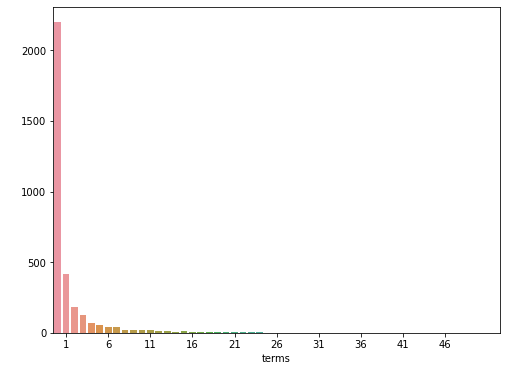

In [31]:
plt.figure(figsize=(8,6))

ax = sns.countplot(frequencies)
plt.xticks(np.arange(1, 50, step=5), np.arange(1, 50, step=5))

# freq = pd.DataFrame(frequencies, columns=['Frequencies']).transpose()
# ax = sns.countplot(freq)
# ax = sns.distplot(frequencies, bins=len(frequencies))
# ax = plt.hist(frequencies[frequencies > 50])

plt.xlabel('terms')
plt.ylabel(' ')
plt.show()

We currently have way too many words, which will make it hard to train our models and may even lead to overfitting. Our solution to the possibility of overfitting is to only keep terms that appear in x% or more of the tweets. 

We can use the `min_df` parameter, where passing a `float` between `[0.0, 1.0]` will filter according to proportion of appearances in the documents, and passing an `int` will filter according to absolute count.

In [32]:
# 0.5% of the tweets or more (appears in 6 or more):

countvec2 = CountVectorizer(min_df=0.005)
sparse_dtm2 = countvec2.fit_transform(text_detokenized)

dtm2 = pd.DataFrame(sparse_dtm2.toarray(), columns=countvec2.get_feature_names(), index=tweets.index)
dtm2.sum().sort_values(ascending=False) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


iphon     335
itun      121
new       113
ipad       91
phone      86
         ... 
femal       6
smart       6
nuevo       6
launch      6
mayb        6
Length: 326, dtype: int64

Note that word frequencies that we print are not the same as the min_df. 

In [33]:
# Now, let's try with 1% of the tweets or more (appears in 12 or more):

countvec3 = CountVectorizer(min_df=0.01)
sparse_dtm3 = countvec3.fit_transform(text_detokenized)

dtm3 = pd.DataFrame(sparse_dtm3.toarray(), columns=countvec3.get_feature_names(), index=tweets.index)
dtm3.sum().sort_values(ascending=False)

iphon      335
itun       121
new        113
ipad        91
phone       86
          ... 
didnt       12
siri        12
steve       12
care        12
instead     12
Length: 123, dtype: int64

## 3. SUPERVISED LEARNING WITH TEXT

In [34]:
from sklearn.model_selection import train_test_split

y = tweets['Negative'].astype('int32')
X = dtm3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=88)
X_train.shape, X_test.shape

((826, 123), (355, 123))

In [35]:
print(y_train.value_counts())
print(y_test.value_counts())

0    699
1    127
Name: Negative, dtype: int64
0    300
1     55
Name: Negative, dtype: int64


In [36]:
# Baseline accuracy
print('ACC', 300/(300 + 55))

ACC 0.8450704225352113


### Decision Tree Classifier with CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 101)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train, y_train)

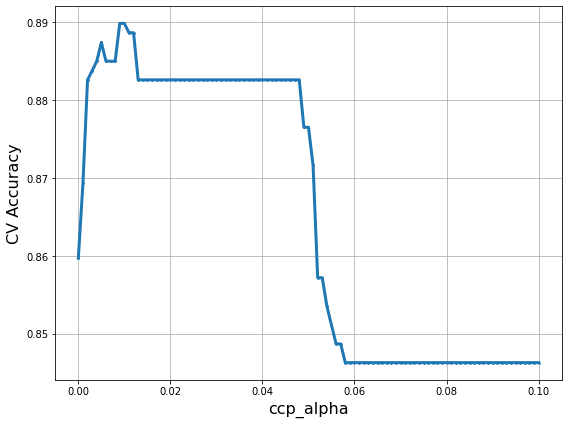

Best ccp_alpha {'ccp_alpha': 0.009000000000000001}


In [ ]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 5


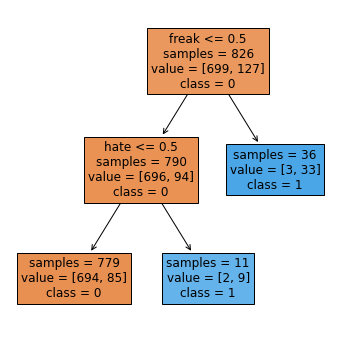

In [ ]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[295   5]
 [ 38  17]]

Accuracy: 0.8788732394366198


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [ ]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[298   2]
 [ 42  13]]

Accuracy: 0.8760563380281691


### Random Forest Classifier with CV

In [ ]:
import time

grid_values = {'max_features': np.linspace(1,120,120, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, cv=5)
rf_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

KeyboardInterrupt: ignored

In [ ]:
max_features = rf_cv.cv_results_['param_max_features'].data
ACC_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, ACC_scores, s=3)
plt.plot(max_features, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best parameters', rf_cv.best_params_)

In [ ]:
y_pred = rf_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

In [ ]:
sorted_idx = rf_cv.best_estimator_.feature_importances_.argsort()

feature_importances = rf_cv.best_estimator_.feature_importances_[sorted_idx[::-1]]
feature_names = X_train.columns[sorted_idx[::-1]]

plt.figure(figsize=(8,7))
plt.barh(feature_names[:10], 100*feature_importances[:10])
plt.show()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=88)

In [ ]:
y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[293   7]
 [ 36  19]]

Accuracy: 0.8788732394366198


Not as good as CART or RF. But what about the training set?

In [ ]:
y_prob = logreg.predict_proba(X_train)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_train.index)

cm = confusion_matrix(y_train, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_train, y_pred))

Confusion Matrix: 
 [[693   6]
 [ 71  56]]

Accuracy: 0.9067796610169492


What about CART on training set?

In [ ]:
y_pred = dtc_cv.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_train, y_pred))

Confusion Matrix: 
 [[694   5]
 [ 85  42]]

Accuracy: 0.8910411622276029


Quite similar to test set performance.

### Gradient Boosting Classifier with CV

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grid_values = {'n_estimators': np.linspace(100, 5000, 50, dtype='int32'),  # np.logspace(6, 12, num=7, base=2, dtype='int32'),
               'learning_rate': [0.01],
               'max_leaf_nodes': np.linspace(2, 10, 8, dtype='int32'),
               'max_depth': [100],
               'min_samples_leaf': [10],
               'random_state': [88]} 

tic = time.time()

gbc = GradientBoostingClassifier()
gbc_cv = GridSearchCV(gbc, param_grid=grid_values, cv=5)
gbc_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

In [ ]:
n_estimators = gbc_cv.cv_results_['param_n_estimators'].data
cv_acc_scores = gbc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.grid(True, which='both')

N = len(grid_values['max_leaf_nodes'])
M = len(grid_values['n_estimators'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], cv_acc_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], cv_acc_scores[(M*i):(M*i)+M], linewidth=2,
             label='max leaf nodes = '+str(grid_values['max_leaf_nodes'][i]))
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_pred = gbc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

### Linear Discriminant Analysis

Normally distributed features?

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[282  18]
 [ 34  21]]

Accuracy: 0.8535211267605634


# References

- [1] D-lab Computational Text Analysis [Link](https://github.com/dlab-berkeley/computational-text-analysis-spring-2019).